# CAO Points

## Introduction

The CAO points data, available from the [CAO website](http://www.cao.ie), is published in a different format for each of the years 2019, 2020, and 2021. Each year's data, therefore, requires a different approach to acquisition, conversion to pandas dataframe, and cleaning. The 2019 data is published in two pdf files; one for level 8 courses, and one for levels 6 and 7. The 2020 data is published as an Excel spreadsheet, and the 2021 data as preformatted text in a HTML webpage.

The relevant columns are `Course Code`, `Course Name`, `Institution Name`, `EOS`, which is the number of points achieved by the last applicant to be offered a place on the course, and `Mid`, which is the mid point between the number of points held by the highest point score and the lowest point score of the applicants offered a place on the course [1].

In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from tabula import read_pdf
import requests
from requests.compat import urljoin
import os


## Acquiring the data

In [8]:
base_url = 'http://www2.cao.ie/points/'
data_folder = 'data/cao'

# 2019 data is provided in PDF format
points_urls  = ({'lvl8_19.pdf': 'lvl8_19.pdf', 
                 'lvl76_19.pdf': 'lvl76_19.pdf', 
                 'CAOPointsCharts2020.xlsx': 'all2020.xlsx', 
                 'l8.php': 'lvl8_21.html',
                 'l76.php': 'lvl76_21.html'})

# for each of the two points pdfs construct url, 
# fetch pdf, and write to working directory
for url in (points_urls):
    response = requests.get(urljoin(base_url, url))
    with open(os.path.join(data_folder, points_urls[url]), 'wb') as f:
        f.write(response.content)

### 2019 Points Data

#### Level 8

In [3]:
# read the entire pdf, extracting tables into a single dataframe
df8 = read_pdf("lvl8_19.pdf", pages="all", multiple_tables=False)[0]
df8.head(10)

,Course Code,INSTITUTION and COURSE,EOS,Mid
0,NaN,Athlone Institute of Technology,NaN,NaN
1,AL801,Software Design with Virtual Reality and Gaming,304,328
2,AL802,Software Design with Cloud Computing,301,306
3,AL803,Software Design with Mobile Apps and Connected...,309,337
4,AL805,Network Management and Cloud Infrastructure,329,442
5,AL810,Quantity Surveying,307,349
6,AL820,Mechanical and Polymer Engineering,300,358
7,AL830,General Nursing,410,429
8,AL832,Psychiatric Nursing,387,403
9,AL836,Nutrition and Health Science,352,383


In [4]:
# Create a new column in the dataframe for institution name 
# identify institution name rows as those containing null course codes
# and add those institution names to the new institution column
df8['Institution'] = df8[df8['Course Code'].isnull()]['INSTITUTION and COURSE']
df8.rename(columns={'INSTITUTION and COURSE':'Course Name'}, inplace=True)
df8.head()

,Course Code,Course Name,EOS,Mid,Institution
0,NaN,Athlone Institute of Technology,NaN,NaN,Athlone Institute of Technology
1,AL801,Software Design with Virtual Reality and Gaming,304,328,NaN
2,AL802,Software Design with Cloud Computing,301,306,NaN
3,AL803,Software Design with Mobile Apps and Connected...,309,337,NaN
4,AL805,Network Management and Cloud Infrastructure,329,442,NaN


In [5]:
# Fill empty fields in the institution column with the most recent non-na field
df8['Institution'] = df8['Institution'].fillna(method='ffill')
df8.head()

,Course Code,Course Name,EOS,Mid,Institution
0,NaN,Athlone Institute of Technology,NaN,NaN,Athlone Institute of Technology
1,AL801,Software Design with Virtual Reality and Gaming,304,328,Athlone Institute of Technology
2,AL802,Software Design with Cloud Computing,301,306,Athlone Institute of Technology
3,AL803,Software Design with Mobile Apps and Connected...,309,337,Athlone Institute of Technology
4,AL805,Network Management and Cloud Infrastructure,329,442,Athlone Institute of Technology


In [6]:
# Finally, remove rows containing only institution names
df8 = df8[df8['Course Code'].notna()]

# Set some display options
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_colwidth", None)

df8

,Course Code,Course Name,EOS,Mid,Institution
1,AL801,Software Design with Virtual Reality and Gaming,304,328,Athlone Institute of Technology
2,AL802,Software Design with Cloud Computing,301,306,Athlone Institute of Technology
3,AL803,Software Design with Mobile Apps and Connected...,309,337,Athlone Institute of Technology
4,AL805,Network Management and Cloud Infrastructure,329,442,Athlone Institute of Technology
5,AL810,Quantity Surveying,307,349,Athlone Institute of Technology
...,...,...,...,...,...
960,WD200,Arts (options),221,296,Waterford Institute of Technology
961,WD210,Software Systems Development,271,329,Waterford Institute of Technology
962,WD211,Creative Computing,275,322,Waterford Institute of Technology
963,WD212,Recreation and Sport Management,274,311,Waterford Institute of Technology


In [7]:
# Examine EOS values which contain non-numeric characters
df8[df8['EOS'].str.contains(r'[^0-9#*]') == True]

,Course Code,Course Name,EOS,Mid,Institution
431,AD101,First Year Art & Design (Common Entry),# +mat,ic 550,National College of Art and Design
432,AD102,Graphic Design and Moving Image Design,# +mat,ic 635,National College of Art and Design
433,AD103,Textile & Surface Design and Jewellery & Objects,# +mat,ic 545,National College of Art and Design
434,AD202,Education & Design or Fine Art (Second Level T...,# +mat,ic 580,National College of Art and Design
435,AD204,Fine Art,# +mat,ic 600,National College of Art and Design
436,AD211,Fashion Design,# +mat,ic 600,National College of Art and Design
437,AD212,Product Design,# +mat,ic 600,National College of Art and Design
439,AD217,Illustration,# +mat,ic 625,National College of Art and Design
440,AD222,Interaction Design,# +mat,ic 657,National College of Art and Design
815,LM124,Mathematics (Math Science/Maths and Physics/Ec...,e)427,521,University of Limerick


In [8]:
# Examine Mid values which contain non-numeric characters
df8[df8['Mid'].str.contains(r'[^0-9]') == True]

,Course Code,Course Name,EOS,Mid,Institution
431,AD101,First Year Art & Design (Common Entry),# +mat,ic 550,National College of Art and Design
432,AD102,Graphic Design and Moving Image Design,# +mat,ic 635,National College of Art and Design
433,AD103,Textile & Surface Design and Jewellery & Objects,# +mat,ic 545,National College of Art and Design
434,AD202,Education & Design or Fine Art (Second Level T...,# +mat,ic 580,National College of Art and Design
435,AD204,Fine Art,# +mat,ic 600,National College of Art and Design
436,AD211,Fashion Design,# +mat,ic 600,National College of Art and Design
437,AD212,Product Design,# +mat,ic 600,National College of Art and Design
439,AD217,Illustration,# +mat,ic 625,National College of Art and Design
440,AD222,Interaction Design,# +mat,ic 657,National College of Art and Design


In [9]:
# Create new column indicating whether the course requires a test, interview or portfolio
# This is indicated by a '#' in the EOS column
df8['Test'] = df8['EOS'].str.contains('#', na=False)

# Create a column indicating courses where not all applicants at EOS point score were offered a place
# This is indicated by a '*' in the EOS column
df8['Not All'] = df8['EOS'].str.contains('\*', na=False)

# Create a column indicating courses where a matric is required
# This is indicated by the string '+matric' in the EOS column.
# However, the tabula table parsing has interpreted the r in matric as a cell boundary so only 'mat' 
# remains in the EOS column and 'ic' appears in the Mid column. The 'ic' will be dealt with next 
df8['Matric'] = df8['EOS'].str.contains('mat', na=False)


In [10]:
# Remove Non-digits from EOS and Mid columns and convert columns to numeric values, with NaNs where values are missing (errors = 'coerce')
# (Because NaN is a float, the whole columns must be floats)
df8['EOS'] = pd.to_numeric(df8['EOS'].str.replace(r'[^0-9]+', '', regex=True), errors='coerce')
df8['Mid'] = pd.to_numeric(df8['Mid'].str.replace(r'[^0-9]+', '', ), errors='coerce')

/tmp/ipykernel_106325/78865963.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df8['Mid'] = pd.to_numeric(df8['Mid'].str.replace(r'[^0-9]+', '', ), errors='coerce')


In [11]:
# Repair LM124 Course Name
df8.loc[df8['Course Code']=='LM124', 'Course Name'] += 'ce)'

#### Level 6 and 7

In [12]:
# read the entire pdf, extracting tables into a single dataframe
df67 = read_pdf("lvl76_19.pdf", pages="all", multiple_tables=False)[0]
df67.head(10)

,Unnamed: 0,ADMISSION DATA 2019,Unnamed: 2,Unnamed: 3
0,NaN,End of Season,NaN,NaN
1,NaN,"Level 6, 7",NaN,NaN
2,NaN,The details given are for general information...,NaN,NaN
3,*,Not all on this points score were offered places,NaN,NaN
4,#,Test / Interview / Portfolio / Audition,NaN,NaN
5,AQA,All qualified applicants,NaN,NaN
6,NaN,NaN,NaN,NaN
7,Course Code,INSTITUTION and COURSE,EOS,Mid
8,NaN,Athlone Institute of Technology,NaN,NaN
9,AL600,Software Design,205,306


In [13]:
# Some text has been included in the dataframe. The actual table starts at row 7 with the row names
# Rename rows using row 7
df67.columns = df67.iloc[7]
df67.rename_axis(None, axis=1, inplace=True)


In [14]:
# Delete rows up to row 7
df67.drop(df67.index[range(0, 8)], axis=0, inplace=True)
df67.head(10)

,Course Code,INSTITUTION and COURSE,EOS,Mid
8,NaN,Athlone Institute of Technology,NaN,NaN
9,AL600,Software Design,205,306
10,AL601,Computer Engineering,196,272
11,AL602,Mechanical Engineering,258,424
12,AL604,Civil Engineering,252,360
13,AL630,Pharmacy Technician,306,366
14,AL631,Dental Nursing,326,379
15,AL632,Applied Science,243,372
16,AL650,Business,210,317
17,AL651,Music and Instrument Technology,AQA,296


In [15]:
df67[df67['Mid'].str.contains(r'[^0-9]') == True]
df67[df67['EOS'].str.contains(r'[^0-9]') == True]

,Course Code,INSTITUTION and COURSE,EOS,Mid
17,AL651,Music and Instrument Technology,AQA,296
18,AL660,Culinary Arts,AQA,216
19,AL661,Bar Supervision,AQA,216
20,AL663,Business (Sport and Recreation),AQA,270
36,AL763,Graphic Design (portfolio),#626,820
45,CW057,"Art (portfolio, Wexford)",#700,700
67,CW807,Sport Coaching and Business Management - GAA (...,#700,700
68,CW817,Sport Coaching and Business Management - Rugby...,#700,700
69,CW827,Sport Coaching and Business Management - Socce...,#700,700
78,PC404,Applied Social Studies - Professional Social Care,AQA,245


In [16]:
# Now this datframe can be cleaned up in the same manner as level 8
def cleanup(df):
    
    df = df.copy(deep=True)
    
    # Create a new column in the dataframe for institution name 
    # identify institution name rows as those containing null course codes
    # and add those institution names to the new institution column
    df['Institution'] = df[df['Course Code'].isnull()]['INSTITUTION and COURSE']
    df.rename(columns={'INSTITUTION and COURSE':'Course Name'}, inplace=True)

    # Fill empty fields in the institution column with the most recent non-na field
    df['Institution'] = df['Institution'].fillna(method='ffill')

    # Finally, remove rows containing only institution names
    df = df[df['Course Code'].notna()]

    # Create new column indicating whether the course requires a test, interview or portfolio
    # This is indicated by a '#' in the EOS column
    df['Test'] = df['EOS'].str.contains('#', na=False)

    # Create a column indicating courses where not all applicants at EOS point score were offered a place
    # This is indicated by a '*' in the EOS column
    df['Not All'] = df['EOS'].str.contains('\*', na=False)

    # Create a column indicating courses where a matric is required
    # This is indicated by the string '+matric' in the EOS column.
    # However, the tabula table parsing has interpreted the r in matric as a cell boundary so only 'mat' 
    # remains in the EOS column and 'ic' appears in the Mid column. The 'ic' will be dealt with next 
    df['Matric'] = df['EOS'].str.contains('mat', na=False)

    # Level 6 & 7 has a new code in EOS -- 'AQA' meaning All Qualified Applicants were offered a place
    # Create a new column for AQA
    df['AQA'] = df['EOS'].str.contains('AQA', na=False)

    # Remove Non-digits from EOS and Mid columns and convert columns to numeric values, with NaNs where values are missing (errors = 'coerce')
    # (Because NaN is a float, the whole columns must be floats)
    df['EOS'] = pd.to_numeric(df['EOS'].str.replace(r'[^0-9]+', '', regex=True), errors='coerce')
    df['Mid'] = pd.to_numeric(df['Mid'].str.replace(r'[^0-9]+', '', regex=True), errors='coerce')

    return df

df67 = cleanup(df67)        

In [17]:
df67.head(10)

,Course Code,Course Name,EOS,Mid,Institution,Test,Not All,Matric,AQA
9,AL600,Software Design,205.0,306.0,Athlone Institute of Technology,False,False,False,False
10,AL601,Computer Engineering,196.0,272.0,Athlone Institute of Technology,False,False,False,False
11,AL602,Mechanical Engineering,258.0,424.0,Athlone Institute of Technology,False,False,False,False
12,AL604,Civil Engineering,252.0,360.0,Athlone Institute of Technology,False,False,False,False
13,AL630,Pharmacy Technician,306.0,366.0,Athlone Institute of Technology,False,False,False,False
14,AL631,Dental Nursing,326.0,379.0,Athlone Institute of Technology,False,False,False,False
15,AL632,Applied Science,243.0,372.0,Athlone Institute of Technology,False,False,False,False
16,AL650,Business,210.0,317.0,Athlone Institute of Technology,False,False,False,False
17,AL651,Music and Instrument Technology,NaN,296.0,Athlone Institute of Technology,False,False,False,True
18,AL660,Culinary Arts,NaN,216.0,Athlone Institute of Technology,False,False,False,True


In [18]:
# Repair WD177 Course Name
df67.loc[df67['Course Code']=='WD177', 'Course Name'] += 'macy.)'

#### Merge dataframes

In [23]:
# add AQA column to level 8 dataframe
df8['AQA'] = False

# add level 8 column to both dataframes
df8['Level 8'] = True
df67['Level 8'] = False



In [46]:
# conatenate level with levels 6 & 7
df = pd.concat([df8, df67], ignore_index=True)

# Rename column names to include year   
df = df.rename({'Course Name': 'Course Name 2019', 
                'EOS': 'EOS 2019', 
                'Mid':'Mid 2019', 
                'Test':'Test 2019', 
                'Not All': 'NotAll 2019',
                'Matric': 'Matric 2019',
                'AQA': 'AQA 2019',
                'Level 8': 'Level8 2019'}, axis=1)

In [47]:
df.head()

,Course Code,Course Name 2019,EOS 2019,Mid 2019,Institution,Test 2019,NotAll 2019,Matric 2019,AQA 2019,Level8 2019
0,AL801,Software Design with Virtual Reality and Gaming,304.0,328.0,Athlone Institute of Technology,False,False,False,False,True
1,AL802,Software Design with Cloud Computing,301.0,306.0,Athlone Institute of Technology,False,False,False,False,True
2,AL803,Software Design with Mobile Apps and Connected...,309.0,337.0,Athlone Institute of Technology,False,False,False,False,True
3,AL805,Network Management and Cloud Infrastructure,329.0,442.0,Athlone Institute of Technology,False,False,False,False,True
4,AL810,Quantity Surveying,307.0,349.0,Athlone Institute of Technology,False,False,False,False,True


In [32]:
# export dataframe to csv
df.to_csv('data/cao/cao_points_2019.csv')

### 2020 Points Data

In [48]:
df2020 = pd.read_excel('CAOPointsCharts2020.xlsx', header=10)
df2020.columns

Index(['CATEGORY (i.e.ISCED description)', 'COURSE TITLE', 'COURSE CODE2',
       'R1 POINTS', 'R1 Random *', 'R2 POINTS', 'R2 Random*', 'EOS',
       'EOS Random *', 'EOS Mid-point', 'LEVEL', 'HEI', 'Test/Interview #',
       'avp', 'v', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8'],
      dtype='object')

### 2021 Points Data

In [9]:
# 1. Select all text between pre tags
# 2. Remove all blank lines and all lines which just contain a tag
# 3. See what's left

In [30]:
from bs4 import BeautifulSoup
from bs4 import SoupStrainer

l8 = os.path.join(data_folder, 'lvl8_21.html')


with open(l8, 'r', encoding='cp1252') as f:

    # Soupstrainer allows us to specify what tags to include.
    # All the content we need is between <pre> tags
    pre = SoupStrainer('pre')
    soup = BeautifulSoup(f, 'html.parser', parse_only=pre)

# Section headers are all between bold tags so remove them
for match in soup.find_all('b'):
    match.decompose()

# Every line we want 
print(soup)


<pre></pre><pre>

AL801  Software Design for Virtual Reality and Gaming       300      
                                   
AL802  Software Design in Artificial Intelligence for Clo   313      
                                   
AL803  Software Design for Mobile Apps and Connected Devi   350      
                                   
AL805  Computer Engineering for Network Infrastructure      321      
                                   
AL810  Quantity Surveying                                   328      
                                   
AL811  Civil Engineering                                             
                                   
AL820  Mechanical and Polymer Engineering                   327      
                                   
AL830  General Nursing                                      451*     444
                                
AL832  Mental Health Nursing                                440*     431
                                
AL835  Pharmacology         

## Analysing the data

In [29]:
df.describe()

,EOS,Mid
count,1340.000000,1368.000000
mean,326.646269,399.729532
std,131.604468,123.622179
min,55.000000,57.000000
25%,236.750000,322.000000
50%,300.000000,369.000000
75%,400.000000,446.000000
max,979.000000,1073.000000


array([[<AxesSubplot:title={'center':'EOS'}>,
        <AxesSubplot:title={'center':'Mid'}>]], dtype=object)

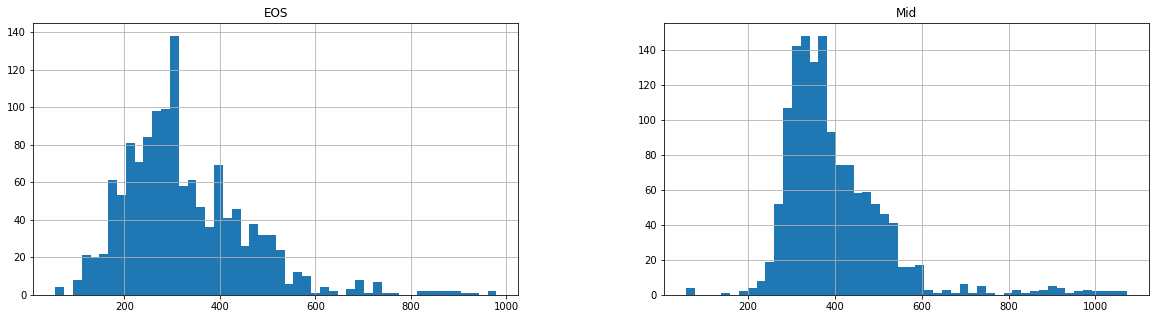

In [31]:
df[['EOS', 'Mid']].hist(bins=50, figsize=(20, 5))

## Conclusion

## References

[1] https://www.independent.ie/life/family/learning/understanding-your-cao-course-guide-26505318.html